# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [2]:
df=pd.read_csv(r'C:\Users\PS4Z\Downloads\archive\Mall_Customers.csv')

In [3]:
#seeing how the looks like
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Understanding the Data

In [4]:
#seeing the shape of data
print('Data Shape: ',df.shape)

Data Shape:  (200, 5)


In [5]:
#finding null values in data
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Getting information about data; null counts and data types of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#list of column names
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
#getting data types of each column header
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
#checking for duplicate values
df.duplicated().sum()

0

In [10]:
#getting five point summary of the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
#making a separate data frame for selected features
feat_df=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
feat=feat_df.columns
feat

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Visualizing the Data

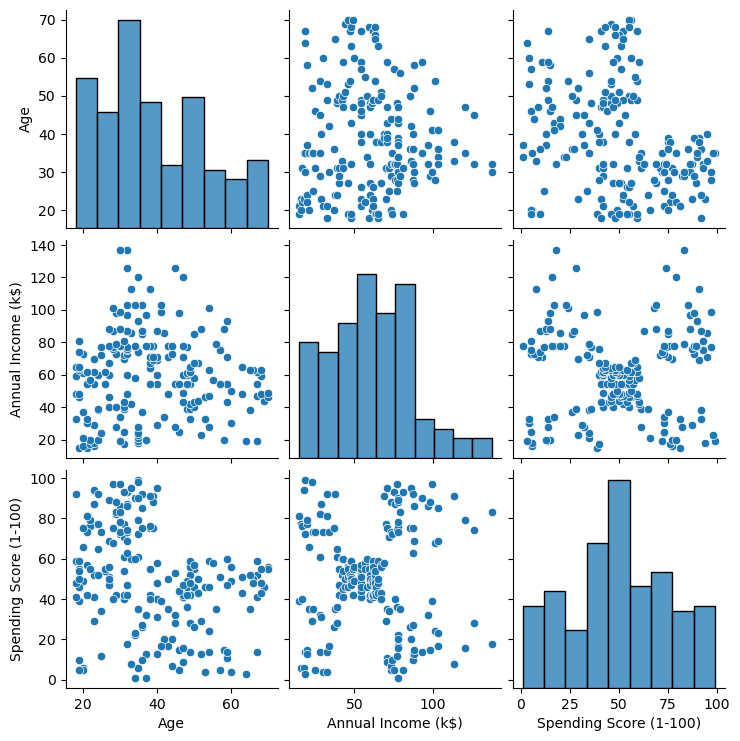

In [12]:
#checking the relations of each such features with one another
sns.pairplot(data=df,vars=feat_df);

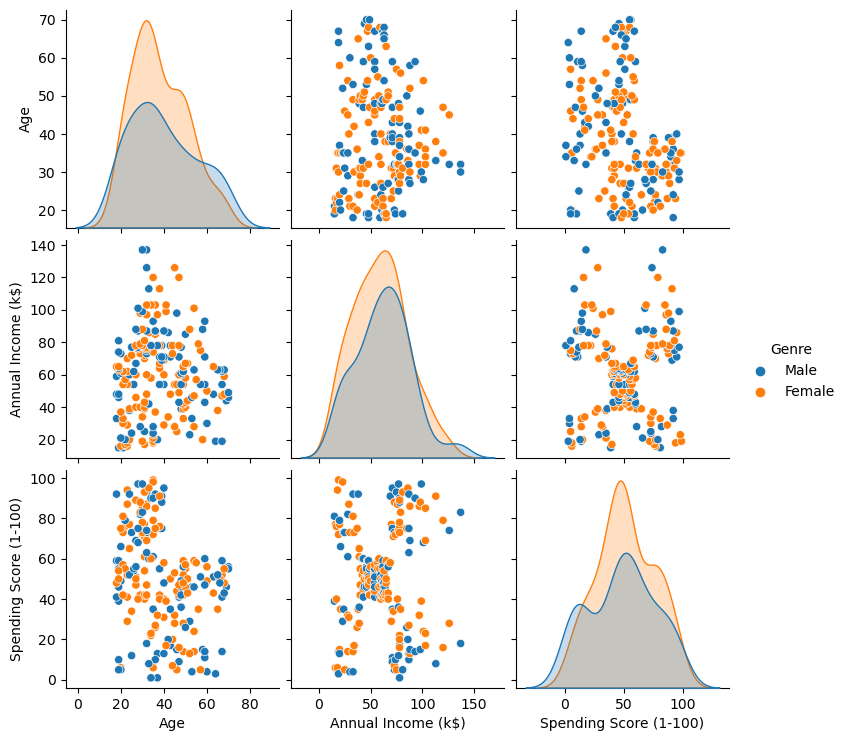

In [13]:
#checking relations with Genre as hue
sns.pairplot(data=df,vars=feat_df,hue='Genre');

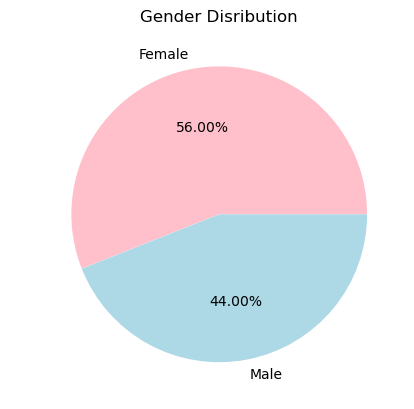

In [14]:
#Pie chart for Gender Distribution
df1=df.groupby('Genre').size()

df1.plot(kind='pie',subplots=True,colors=['pink','lightblue'],explode=[0,0.001],labels=['Female','Male'],autopct='%.2f%%' )
plt.title("Gender Disribution")
plt.ylabel(" ");

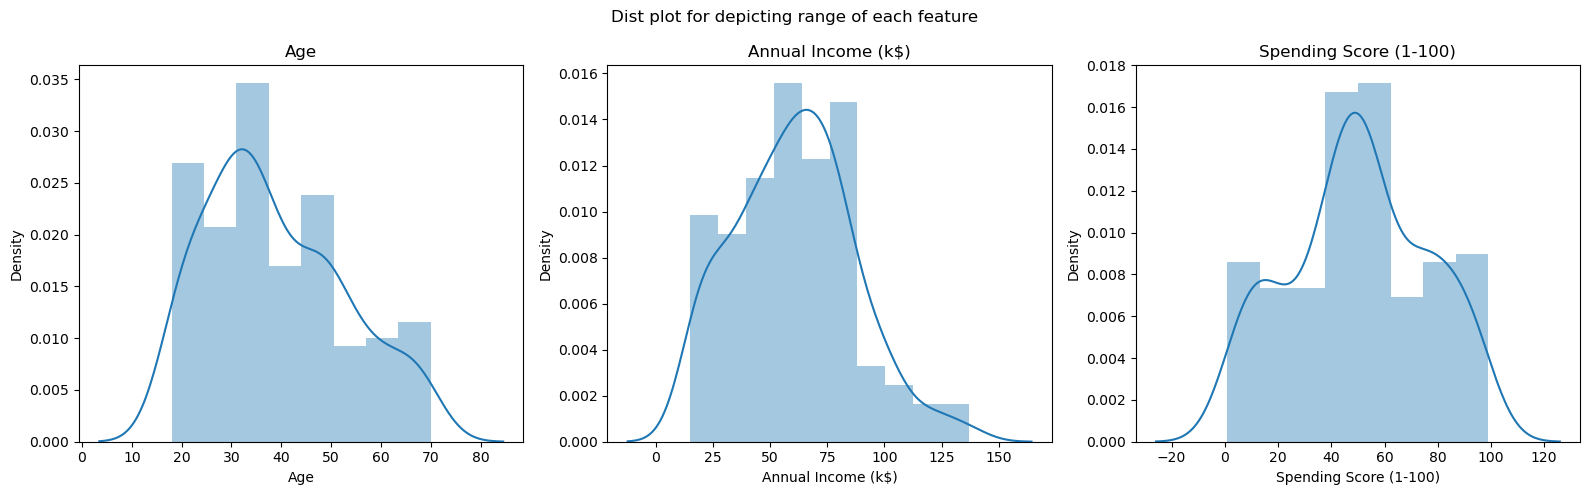

In [15]:
#plotting features 
plt.figure(figsize=(16,5))
plt.suptitle('Dist plot for depicting range of each feature')
for a in range(0,len(feat)):
    plt.subplot(1,3,a+1)
    sns.distplot(df[feat[a]])
    plt.title(label=feat[a])
    plt.tight_layout();

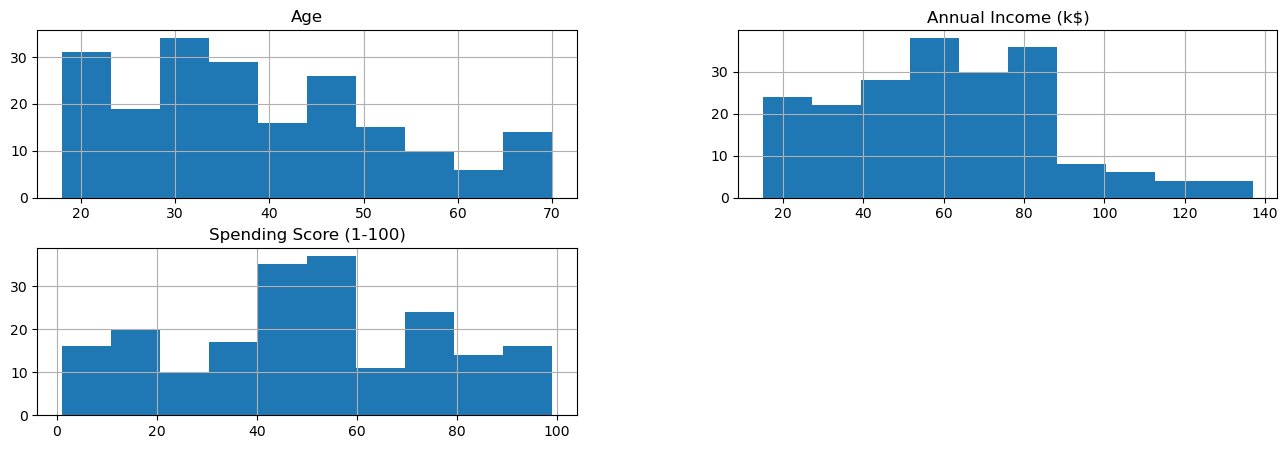

In [16]:
#Histogram of select features
feat_df.hist(figsize=(16,5));

In [17]:
!pip install dabl

In [18]:
import dabl

Target looks like regression


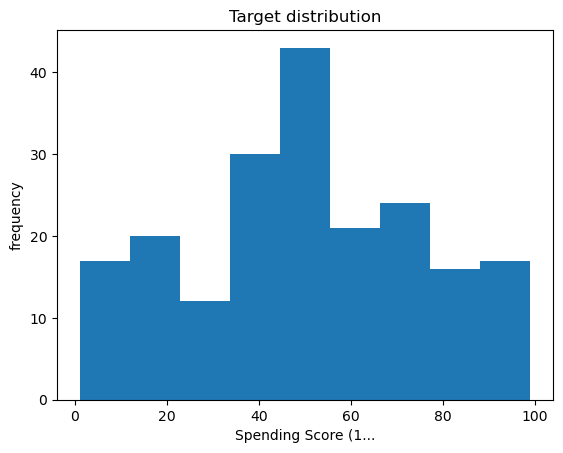

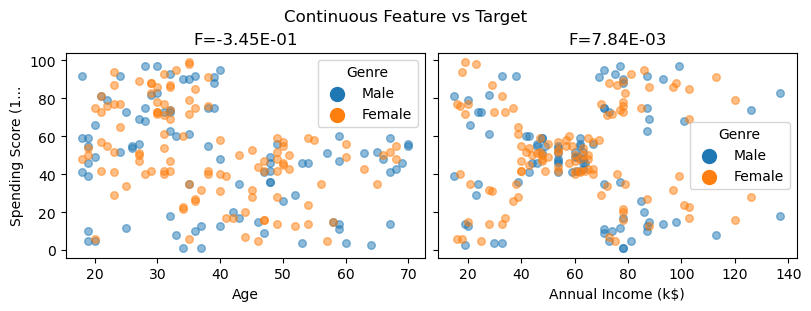

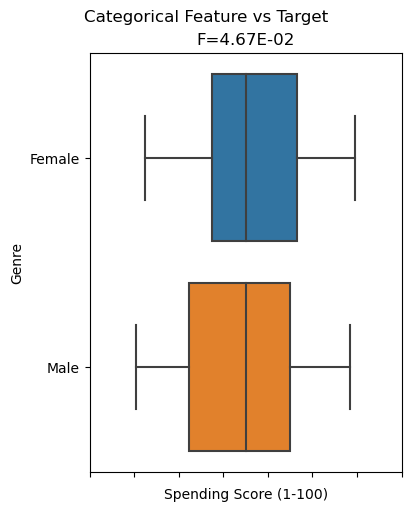

In [19]:
#statistical Data Analysis
dabl.plot(df,target_col='Spending Score (1-100)');

In [20]:
#Correlation among features
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


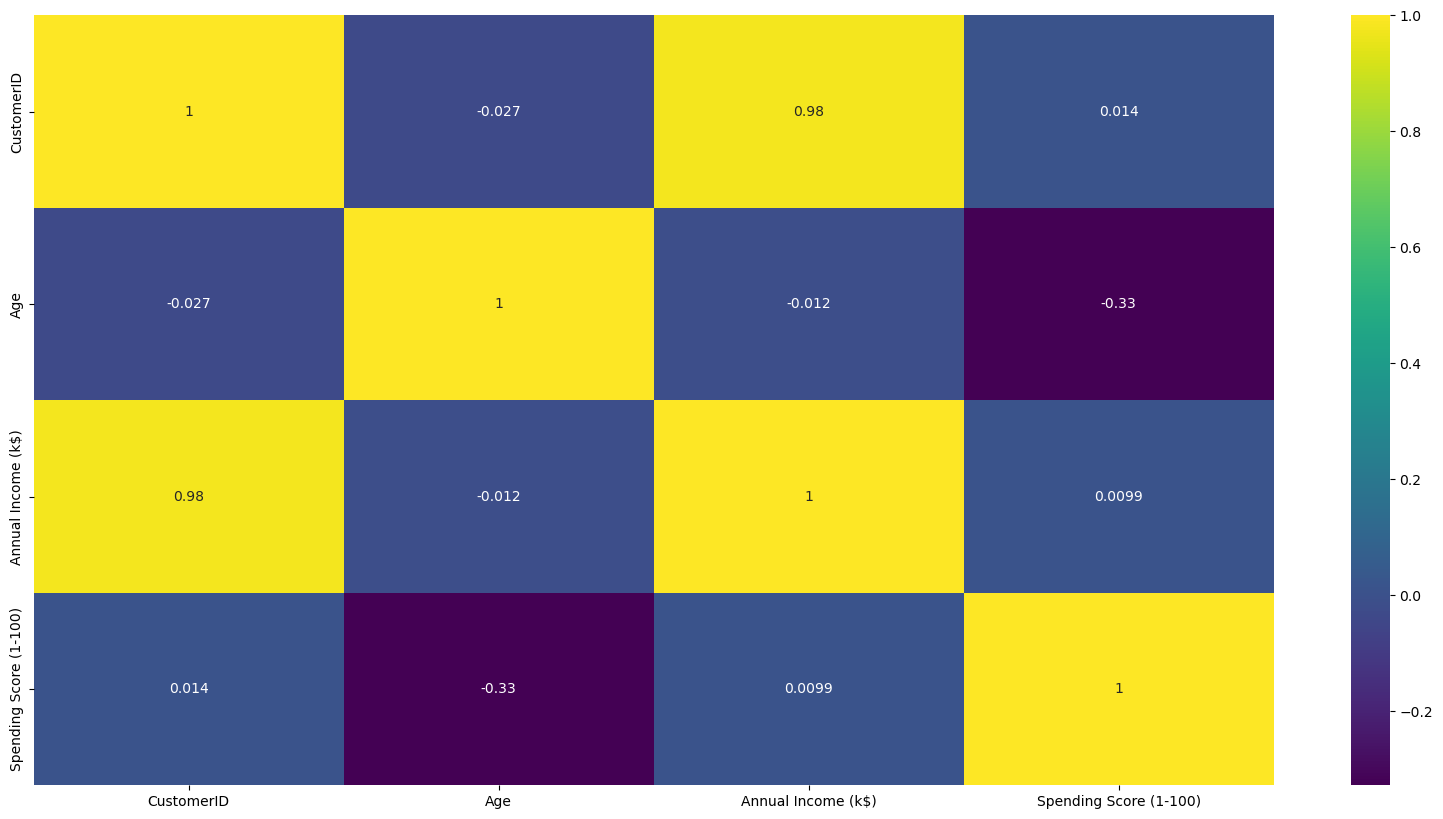

In [21]:
#Plotting the correlation into a Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True);

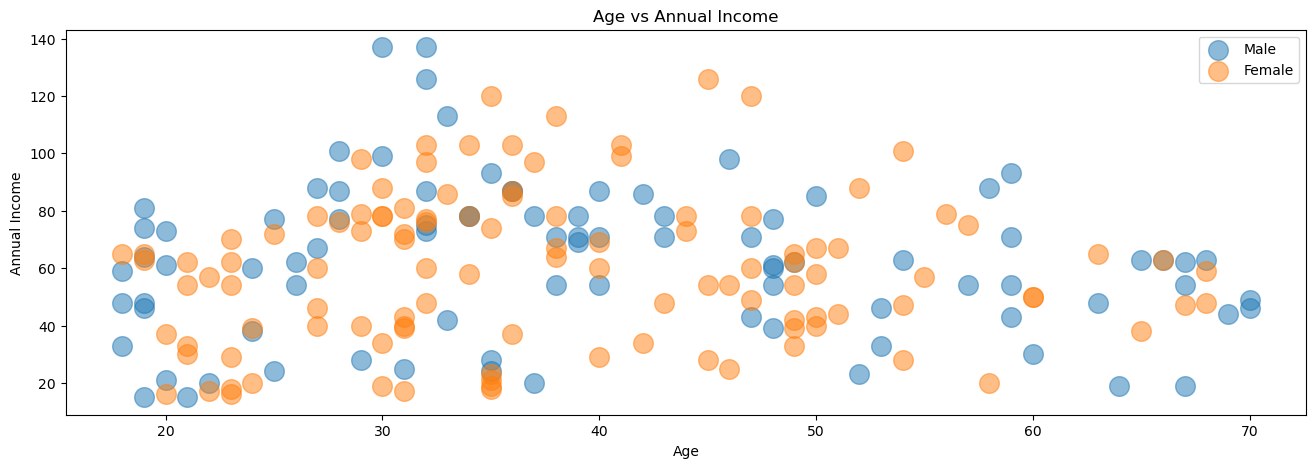

In [22]:
#Age VS Annual Income based on Gender
plt.figure(figsize=(16,5))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)', data=df[df['Genre']==gender],s=200,alpha=0.5,label=gender)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income")
plt.legend();

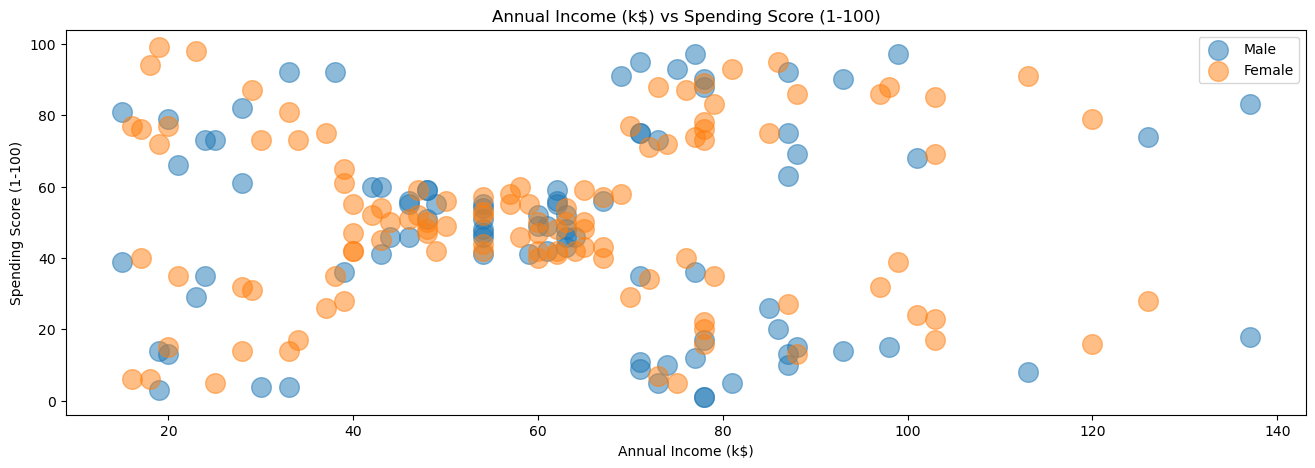

In [23]:
#Annual Income VS Spending Score(1-100) based on Gender
plt.figure(1,figsize=(16,5))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Genre']==gender],s=200,alpha=0.5,label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.legend();

# K-Means Clusreting

In [24]:
from sklearn.cluster import KMeans

In [25]:
x=df.iloc[:,[3,4]].values

In [26]:
k = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=101)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

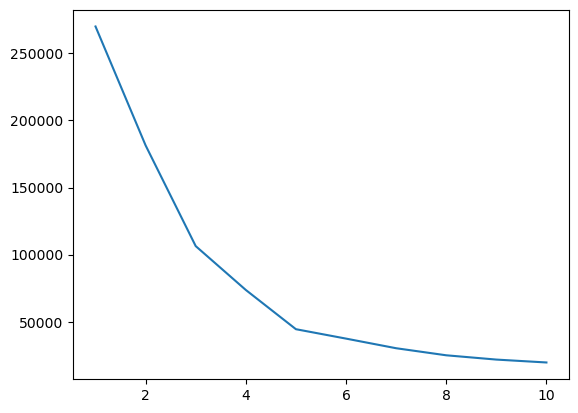

In [27]:
plt.plot(range(1, 11), k);

In [28]:
#Model
model=KMeans(n_clusters=5,random_state=101)
y=model.fit_predict(x)

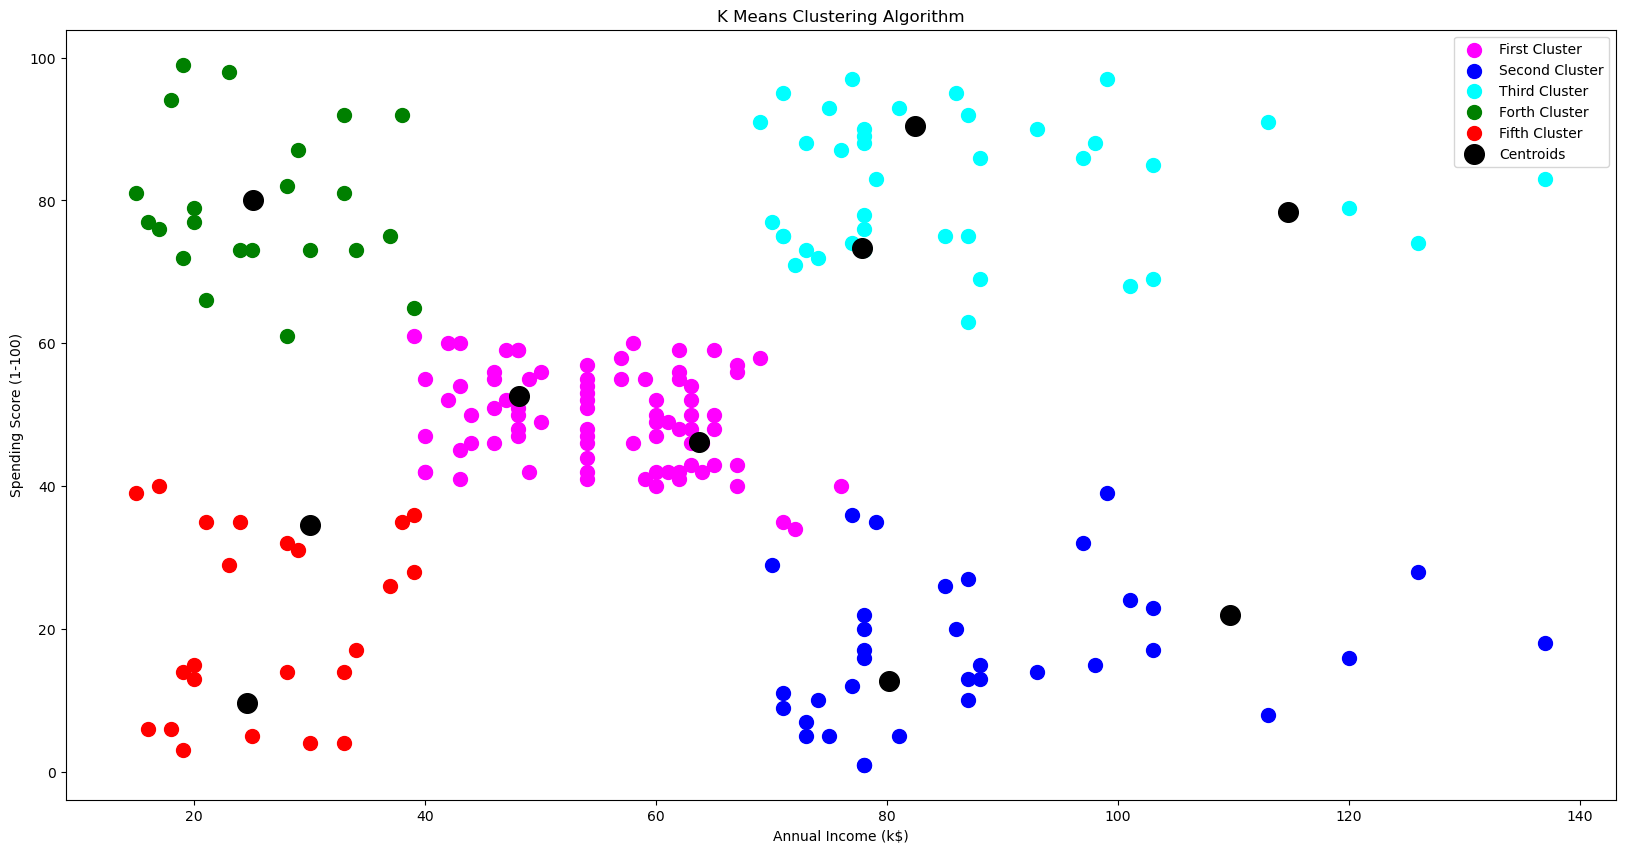

In [29]:
plt.figure(1 ,figsize=(20,10))
#First Cluster
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='magenta',label='First Cluster')
#Second Cluster
plt.scatter(x[y==1,0],x[y==1,1],s=100,c='blue',label='Second Cluster')
#Third Cluster
plt.scatter(x[y==2,0],x[y==2,1],s=100,c='cyan',label='Third Cluster')
#Forth Cluster
plt.scatter(x[y==3,0],x[y==3,1],s=100,c='green',label='Forth Cluster')
#Fifth Cluster
plt.scatter(x[y==4,0],x[y==4,1],s=100,c='red',label='Fifth Cluster')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();